In [23]:
from utils import showDisplay
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
from scipy.special import kl_div
import scipy.stats as stats
import pandas as pd
import seaborn as sns

In [24]:
showDisplay(1.1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
showDisplay(1.2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [26]:
def plot_binomial_vs_normal_subplots(n_values, p_values):
    for n in n_values:
        fig, axes = plt.subplots(1, len(p_values), figsize=(15, 5))

        for idx, p in enumerate(p_values):
            ax = axes[idx]
            x = np.arange(0, n + 1)
            binomial_pmf = binom.pmf(x, n, p)

            # Gaussian Approximation (discrete CDF approach)
            normal_cdf = norm.cdf(x + 0.5, loc=n*p, scale=np.sqrt(n*p*(1-p))) - norm.cdf(x - 0.5, loc=n*p, scale=np.sqrt(n*p*(1-p)))
            normal_cdf[0] = norm.cdf(0.5, loc=n*p, scale=np.sqrt(n*p*(1-p)))  # First bin adjustment
            normal_cdf /= np.sum(normal_cdf)  # Normalize

            # Plot
            ax.bar(x, binomial_pmf, alpha=0.6, color='blue', label='Binomial PMF')
            ax.plot(x, normal_cdf, color='red', linewidth=2, label='Gaussian Approximation')

            ax.set_xlabel("k (Number of Successes)")
            ax.set_ylabel("Probability")
            ax.set_title(f"n={n}, p={p}")
            ax.legend()

        plt.suptitle(f"Binomial vs Normal Approximation for n={n}", fontsize=14)
        plt.tight_layout()
        plt.show()

In [27]:
# KL Divergence Calculation
def kl_divergence(p, q):
    p = np.array(p)
    q = np.array(q)

    # Avoid division by zero by replacing zero values
    p = np.where(p == 0, 1e-10, p)
    q = np.where(q == 0, 1e-10, q)

    return np.sum(p * np.log(p / q))

In [28]:
# Function to compute KL divergence for different values of n
def compute_kl_divergence(n_values, p):
    kl_values = []

    for n in n_values:
        x = np.arange(0, n + 1)
        binomial_pmf = binom.pmf(x, n, p)

        # Discrete normal approximation using CDF differences
        normal_cdf = norm.cdf(x + 0.5, loc=n*p, scale=np.sqrt(n*p*(1-p))) - norm.cdf(x - 0.5, loc=n*p, scale=np.sqrt(n*p*(1-p)))
        normal_cdf[0] = norm.cdf(0.5, loc=n*p, scale=np.sqrt(n*p*(1-p)))  # First bin adjustment

        normal_cdf /= np.sum(normal_cdf)  # Normalize

        kl_values.append(kl_divergence(binomial_pmf, normal_cdf))

    return kl_values

In [29]:
# Function to plot KL Divergence for different n values
def plot_kl_convergence(n_values, p_values):
    n_values = np.arange(5, 101, 5)
    p_values = [0.1, 0.5, 0.9]

    plt.figure(figsize=(8, 5))

    for p in p_values:
        kl_values = compute_kl_divergence(n_values, p)
        plt.plot(n_values, kl_values, label=f"p={p}", marker='o')

    plt.xlabel("n (Total Number of Tosses)")
    plt.ylabel("KL Divergence")
    plt.title("KL Divergence Between Binomial and Gaussian Distributions")
    plt.legend()
    plt.grid(True)
    plt.show()

In [30]:
showDisplay(1.3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

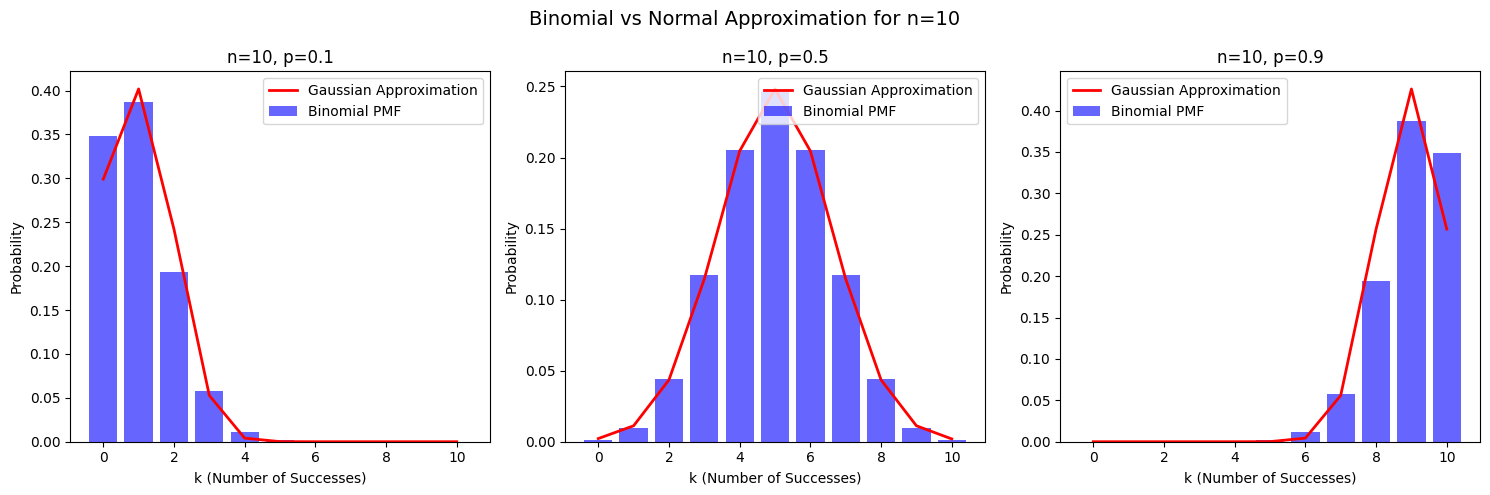

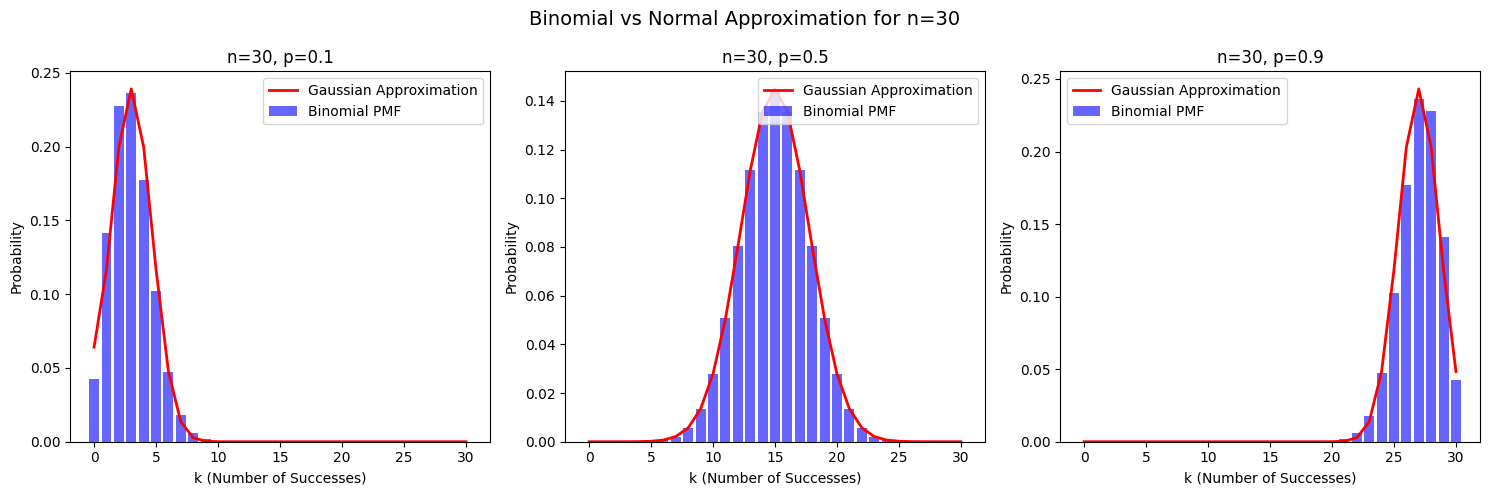

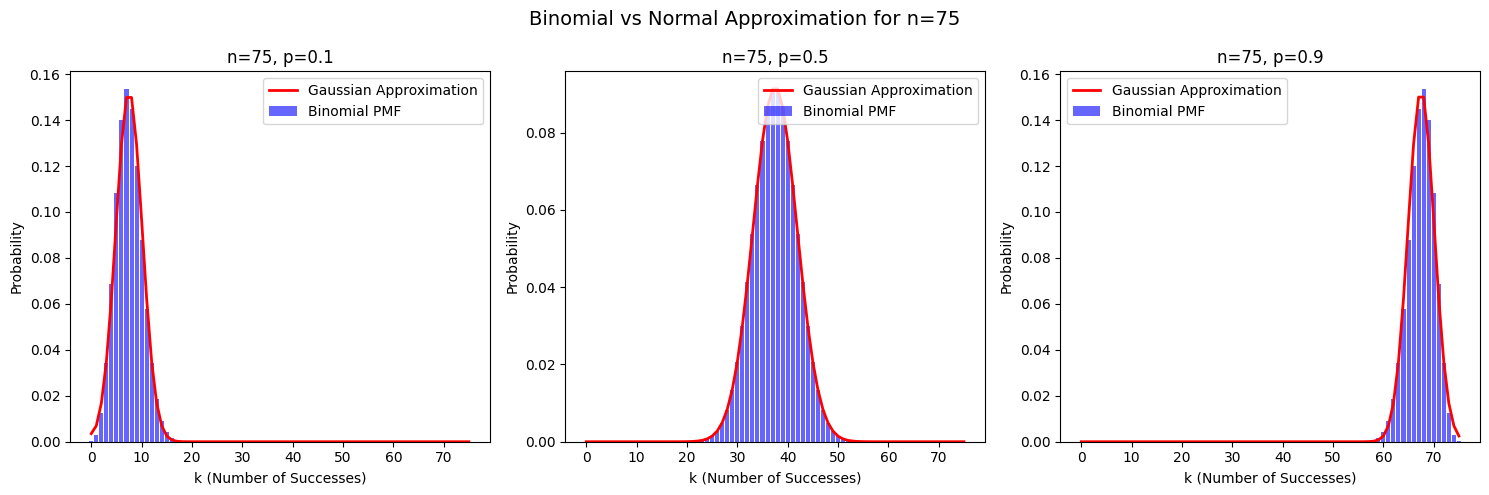

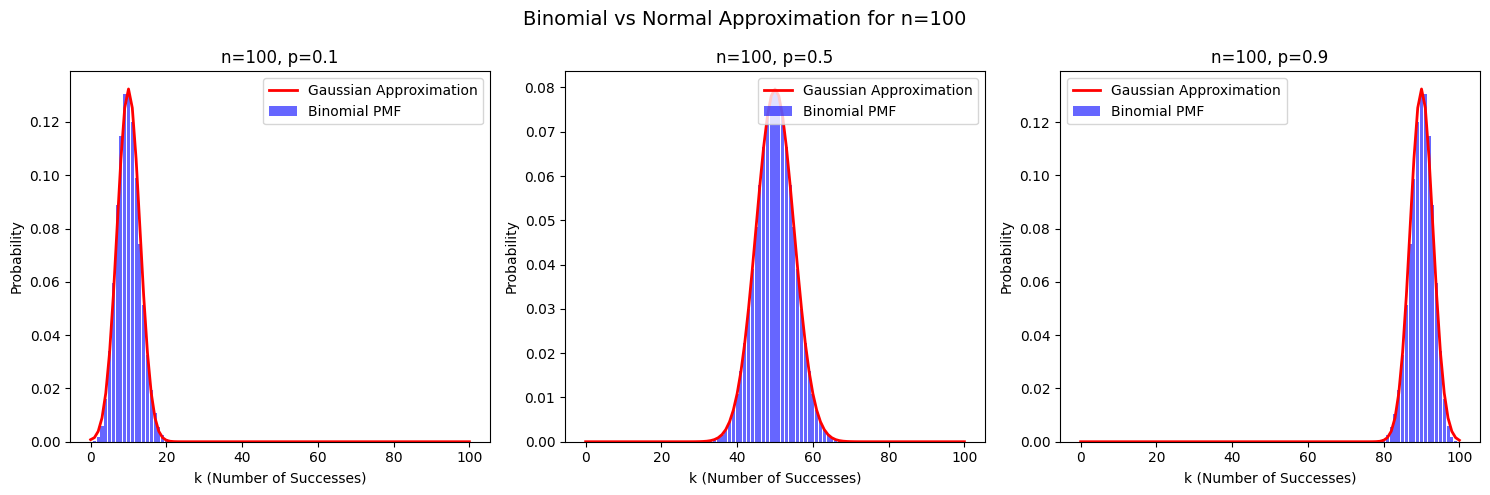

In [31]:
# Custom values
n_values = [10, 30, 75, 100]
p_values = [0.1, 0.5, 0.9]

# Generate subplots for binomial vs normal
plot_binomial_vs_normal_subplots(n_values, p_values)

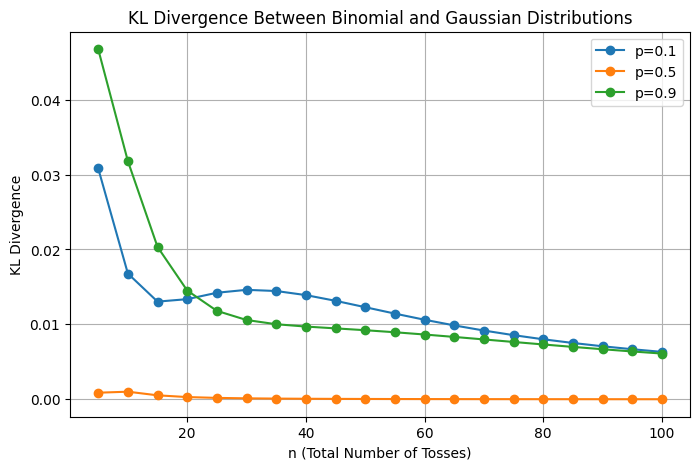

In [32]:
# KL Divergence plot
plot_kl_convergence(n_values, p_values)

In [33]:
showDisplay(1.4)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>